# Analysis and Visualization the Stock market data

Importing all requried modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Reading Csv file and set Date as DateTime format and displaying the dataset

In [2]:
df=pd.read_csv("stocks.csv",parse_dates=["Date"])
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


Sizes of each stock

In [3]:
df.groupby("Ticker").size()

Ticker
AAPL    62
GOOG    62
MSFT    62
NFLX    62
dtype: int64

#Drop null Values in the csv file

In [4]:
df.drop_duplicates()
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Set index as Date

In [18]:
df.set_index('Date',inplace=True)

Data visualization to Analysis the patterns

Stock Movement analysis

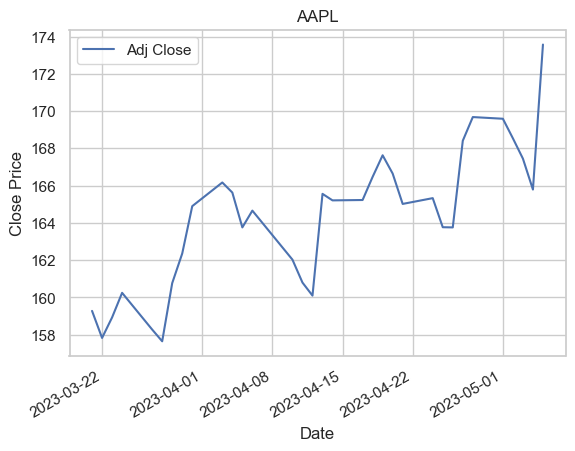

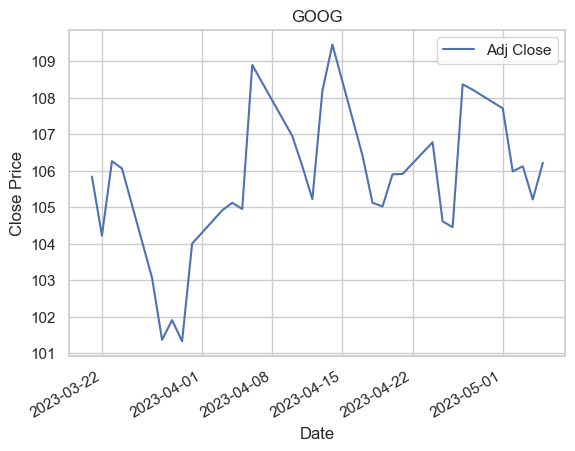

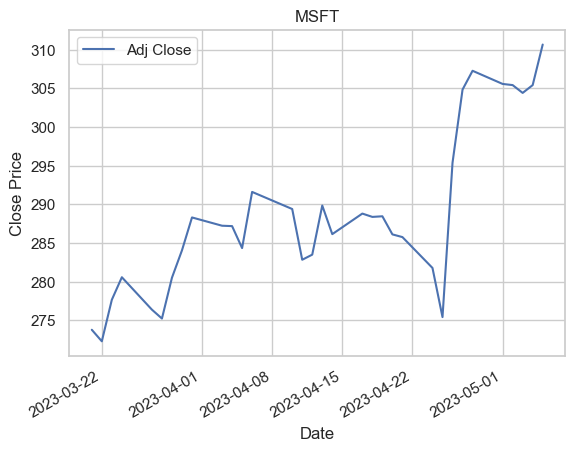

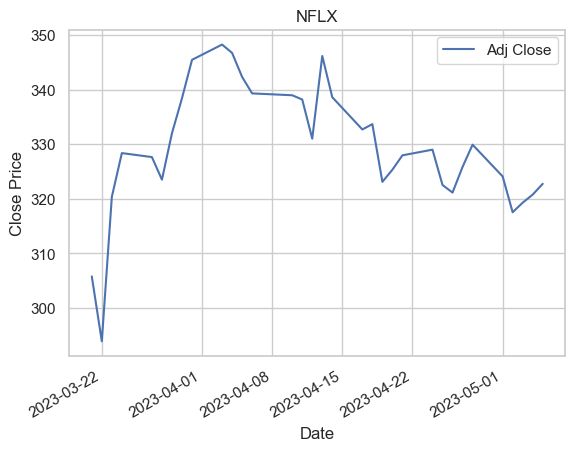

In [21]:
for Ticker,stock in df.groupby("Ticker"):
     stock=stock.reset_index()
     stock.plot(kind="line",x="Date",y="Adj Close",fig=(10,20), title=f"{Ticker}")
     plt.xlabel('Date')
     plt.ylabel('Close Price') 
     plt.show() 


Plot all the stocks in one figure

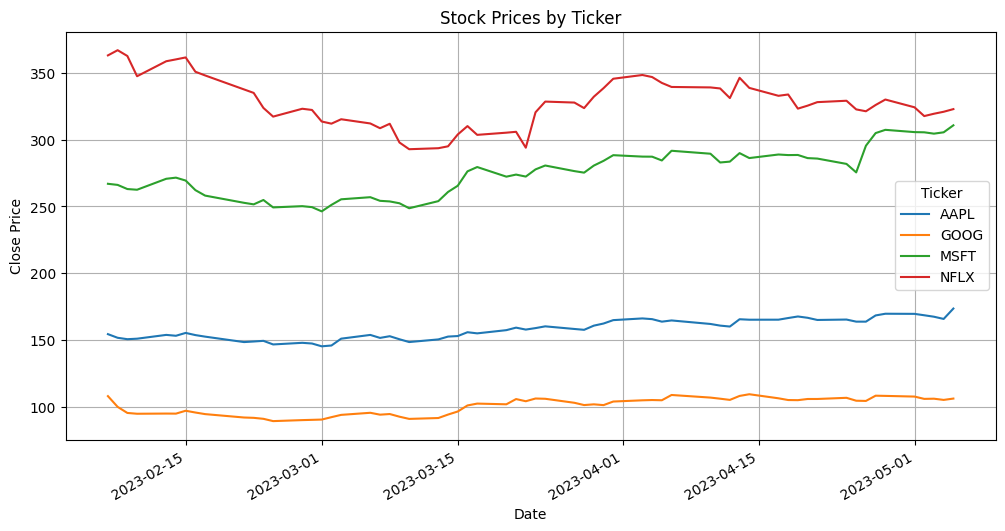

In [6]:


# Plot all tickers in a single area plot
df.pivot(columns='Ticker', values='Adj Close').plot(kind='line', figsize=(12, 6), title="Stock Prices by Ticker")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()


Calculate Moving Average of 10 and 30 days

In [7]:
Moving_Average=['MA10','MA30']
for i in Moving_Average:
    ma=int(i[2:])
    df[i]=df.groupby("Ticker")["Adj Close"].rolling(window=ma).mean().reset_index(0,drop=True)
for Ticker,stock in df.groupby("Ticker"):
    print(f"Moing Average for {Ticker}")
    print(stock[Moving_Average])    
    

Moing Average for AAPL
                  MA10        MA30
Date                              
2023-02-07         NaN         NaN
2023-02-08         NaN         NaN
2023-02-09         NaN         NaN
2023-02-10         NaN         NaN
2023-02-13         NaN         NaN
...                ...         ...
2023-05-01  166.631000  163.437000
2023-05-02  166.837999  163.808333
2023-05-03  166.819998  164.080666
2023-05-04  166.733998  164.345999
2023-05-05  167.588998  164.834000

[62 rows x 2 columns]
Moing Average for GOOG
                  MA10        MA30
Date                              
2023-02-07         NaN         NaN
2023-02-08         NaN         NaN
2023-02-09         NaN         NaN
2023-02-10         NaN         NaN
2023-02-13         NaN         NaN
...                ...         ...
2023-05-01  326.276999  329.531666
2023-05-02  324.661996  329.945665
2023-05-03  324.279996  330.395998
2023-05-04  323.822995  331.291998
2023-05-05  323.300995  331.371665

[62 rows x 2 columns

Visulization of Moving Average

In [8]:
# Aggregate data by date, taking the mean for each date
for ticker, group in df.groupby('Ticker'):
    group = group.reset_index()
    fig=px.line(group,x='Date',
                y=['Adj Close','MA10','MA30'],
                title=f'{Ticker} Moving Average')
    fig.show()    

Calculate Daliy returns 

In [9]:
df["daily returns"]= df.groupby("Ticker")['Close'].pct_change()

Visulization of Daliy returns

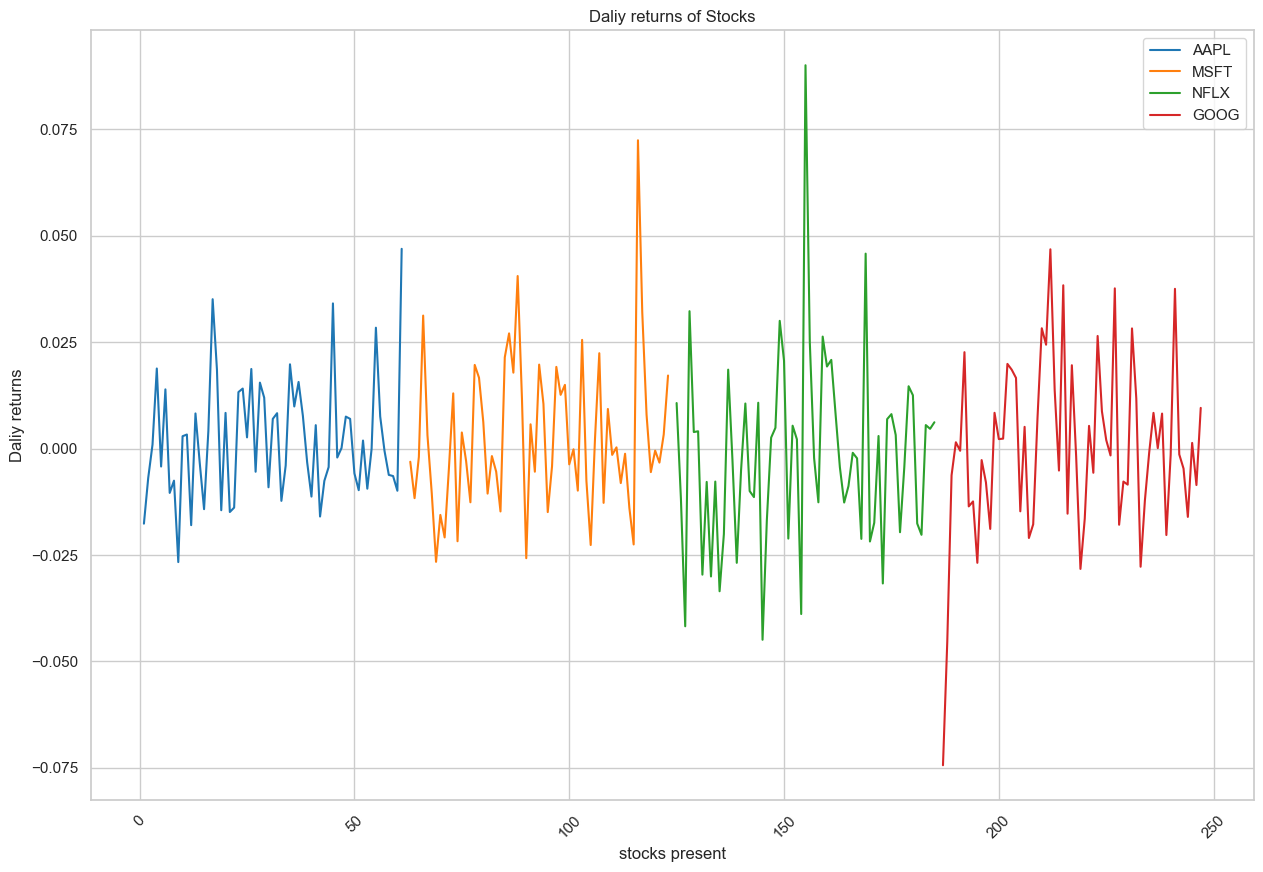

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,10))
df=df.reset_index()
sns.lineplot(data=df, x=df.index, y='daily returns', hue='Ticker', palette='tab10')
plt.ylabel('Daliy returns')
plt.title("Daliy returns of Stocks")
plt.xlabel("stocks present")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Calculating Volatility of 10 days and visulization the volatility

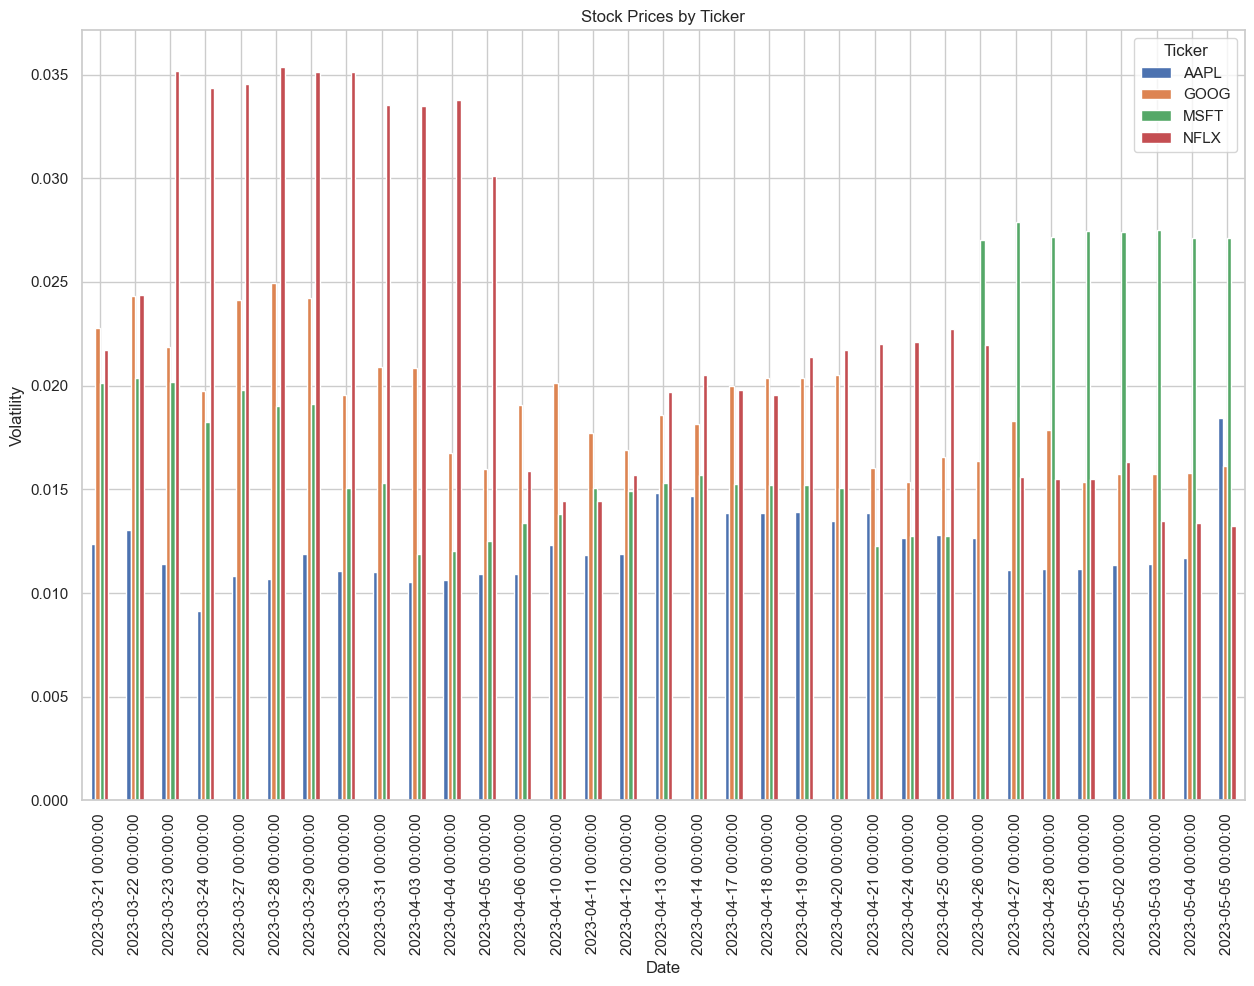

In [11]:
df["volatility"]=df.groupby('Ticker')['daily returns'].rolling(window=10).std().reset_index(0,drop=True)
df.dropna(inplace=True)

df.pivot(values='volatility',columns='Ticker',index='Date').plot(kind='bar', figsize=(15, 10), title="Stock Prices by Ticker")
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(title='Ticker')
plt.show()